In [3]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'GeoTab_1000_sample.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
data.head()


,localdate,localhour,longitude,latitude,temperature_c,stdev_c,sensing_identifier,partition_0,gi,ui,mi,svf
0,2021-07-19,20,-84.747677,39.215784,25.4,1.2,T,geotab-demo,25.279332,24.065883,0.0,0.544313
1,2021-07-19,20,-84.817715,39.148493,26.2,0.7,T,geotab-demo,19.481271,18.449533,0.0,0.946018
2,2021-07-19,20,-84.799175,39.179907,26.2,0.8,T,geotab-demo,26.574498,18.520996,0.0,0.683060
3,2021-07-19,20,-84.742527,39.220591,26.9,0.6,T,geotab-demo,30.377686,13.214286,0.0,0.620352
4,2021-07-19,20,-84.804668,39.167891,26.1,0.7,T,geotab-demo,19.901193,21.438163,0.0,0.836466


In [4]:
# Convert temperature from Celsius to Fahrenheit and discard the 'mi' column
data['temperature_f'] = (data['temperature_c'] * 9/5) + 32
data_cleaned = data.drop(['mi'], axis=1)

# Display the first few rows of the cleaned DataFrame
data_cleaned.head()


,localdate,localhour,longitude,latitude,temperature_c,stdev_c,sensing_identifier,partition_0,gi,ui,svf,temperature_f
0,2021-07-19,20,-84.747677,39.215784,25.4,1.2,T,geotab-demo,25.279332,24.065883,0.544313,77.72
1,2021-07-19,20,-84.817715,39.148493,26.2,0.7,T,geotab-demo,19.481271,18.449533,0.946018,79.16
2,2021-07-19,20,-84.799175,39.179907,26.2,0.8,T,geotab-demo,26.574498,18.520996,0.683060,79.16
3,2021-07-19,20,-84.742527,39.220591,26.9,0.6,T,geotab-demo,30.377686,13.214286,0.620352,80.42
4,2021-07-19,20,-84.804668,39.167891,26.1,0.7,T,geotab-demo,19.901193,21.438163,0.836466,78.98


In [5]:
# Calculate the summary statistics for temperature in Fahrenheit
max_temp_f = data_cleaned['temperature_f'].max()
mean_temp_f = data_cleaned['temperature_f'].mean()
min_temp_f = data_cleaned['temperature_f'].min()
std_temp_f = data_cleaned['temperature_f'].std()
range_temp_f = max_temp_f - min_temp_f

# Convert the summary statistics to Celsius
max_temp_c = (max_temp_f - 32) * 5/9
mean_temp_c = (mean_temp_f - 32) * 5/9
min_temp_c = (min_temp_f - 32) * 5/9
std_temp_c = std_temp_f / (9/5)  # Standard deviation remains the same when converting scales
range_temp_c = range_temp_f / (9/5)

# Calculate the area of the polygon formed by the latitude and longitude points
# For simplicity, assuming the points form a convex polygon and using a basic geometric approach

# Sort the points in counterclockwise order and calculate the area using the shoelace formula
def calculate_polygon_area(coords):
    n = len(coords)  # Number of vertices
    area = 0.0
    for i in range(n):
        j = (i + 1) % n
        area += coords[i][0] * coords[j][1]
        area -= coords[j][0] * coords[i][1]
    area = abs(area) / 2.0
    return area

# Convert degrees to radians for latitude and longitude
import numpy as np

def degrees_to_radians(degrees):
    return degrees * np.pi / 180

# Approximate the Earth's radius in kilometers
EARTH_RADIUS_KM = 6371.0

# Convert latitude and longitude to Cartesian coordinates
def lat_lon_to_cartesian(lat, lon, earth_radius=EARTH_RADIUS_KM):
    lat_rad = degrees_to_radians(lat)
    lon_rad = degrees_to_radians(lon)
    x = earth_radius * np.cos(lat_rad) * np.cos(lon_rad)
    y = earth_radius * np.cos(lat_rad) * np.sin(lon_rad)
    return x, y

# Get unique points to form the polygon
unique_points = data_cleaned[['latitude', 'longitude']].drop_duplicates().values

# Convert latitudes and longitudes to Cartesian coordinates
cartesian_points = np.array([lat_lon_to_cartesian(lat, lon) for lat, lon in unique_points])

# Calculate the area of the polygon
polygon_area_km2 = calculate_polygon_area(cartesian_points)

# Summary in the requested format
summary = {
    'Temperature Statistics': {
        'Maximum': f"{max_temp_f:.2f} °F / {max_temp_c:.2f} °C",
        'Mean': f"{mean_temp_f:.2f} °F / {mean_temp_c:.2f} °C",
        'Minimum': f"{min_temp_f:.2f} °F / {min_temp_c:.2f} °C",
        'Standard deviation': f"{std_temp_f:.2f} °F / {std_temp_c:.3f} °C",
        'Temperature range': f"{range_temp_f:.2f} °F / {range_temp_c:.2f} °C",
        'Area of the Polygon': f"{polygon_area_km2:.1f} km²"
    }
}

summary


{'Temperature Statistics': {'Maximum': '87.62 °F / 30.90 °C',
  'Mean': '75.32 °F / 24.07 °C',
  'Minimum': '64.40 °F / 18.00 °C',
  'Standard deviation': '3.03 °F / 1.685 °C',
  'Temperature range': '23.22 °F / 12.90 °C',
  'Area of the Polygon': '96.7 km²'}}

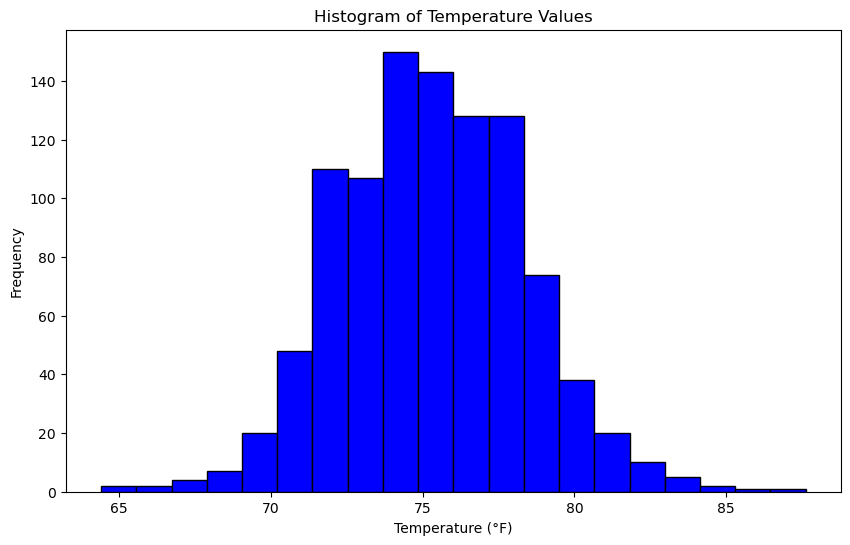

In [6]:
import matplotlib.pyplot as plt

# Plot the histogram of the temperature values within the polygon
plt.figure(figsize=(10,6))
plt.hist(data_cleaned['temperature_f'], bins=20, color='blue', edgecolor='black')

# Adding titles and labels
plt.title('Histogram of Temperature Values')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


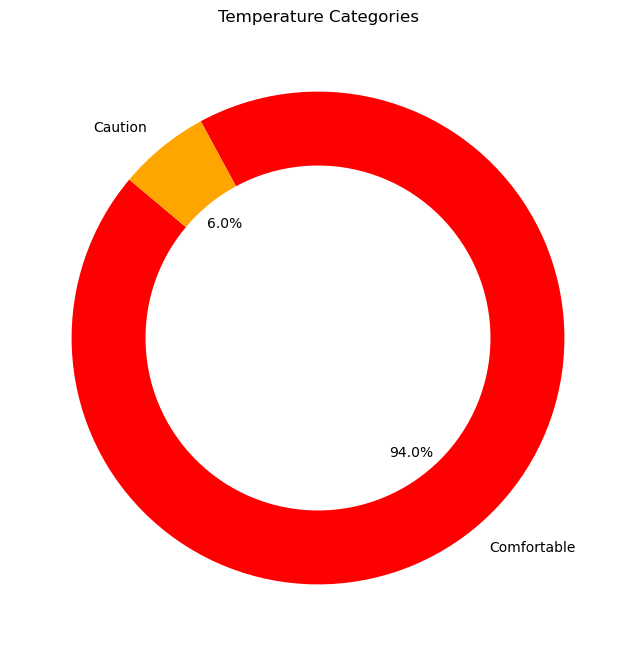

In [7]:
# Define the temperature categories in Fahrenheit
temp_categories = {
    'Extreme Danger': {'min': 125, 'max': float('inf')},
    'Danger': {'min': 103, 'max': 125},
    'Extreme Caution': {'min': 90, 'max': 103},
    'Caution': {'min': 80, 'max': 90},
    'Comfortable': {'min': float('-inf'), 'max': 80}
}

# Assign each temperature to a category
def categorize_temperature(temp_f):
    for category, temp_range in temp_categories.items():
        if temp_range['min'] <= temp_f <= temp_range['max']:
            return category
    return 'Unknown'

# Apply the categorization to the temperature column
data_cleaned['temp_category'] = data_cleaned['temperature_f'].apply(categorize_temperature)

# Count the number of occurrences of each category
category_counts = data_cleaned['temp_category'].value_counts()

# Plot a donut chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'orange', 'yellow', 'lightblue', 'green'])
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))

# Adding title
plt.title('Temperature Categories')

# Show the plot
plt.show()
